## Breast Cancer Analysis 

Link to datasource: https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset/data

**Requirements**

1. python 

2. matplotlib

3. seaborn

4. numpy

5. pandas

**Context**

This project utilizes a breast cancer dataset from Kaggle from the University of Wisconsin Clinical Sciences
Center. The authors who published this data set took the data from the University of California Irvine - Machine Learning
Repository. (Link to source: https://data.world/health/breast-cancer-wisconsin)

The objective of this project is to find correlations between tumors and their size and texture (smoothness) 
 To determine whether or not the tumor is benign (not cancerous) or malignant (cancerous). 

**File Dictionary**

1. ***ID:*** Identification of the Patient 

2. ***Diagnosis:*** Diagnosis of the tumor, "M" for malignant/cancerous, "B" for benign/not cancerous

3. ***Radius:*** Mean of the distances from the center to points on the perimeter

4. ***Texture:*** Standard deviation of gray-scale values

5. ***Perimeter:*** 

6. ***Area:*** 

7. ***Smoothness:*** Local variation in radius length

8. ***Compactness:*** Calculated by perimeter^2 / area - 1.0

9. ***Concavity:*** Severity of concave portions of the contour

10. ***Concave Points:*** Number of concave portions of the contour

11. ***Symmetry:*** 

12. ***Fractal Dimention:*** Coastline approximation



### Importing Python Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Initial Data Exploration

Reading the data and sampling the data set by extracting the first ten lines from the file

In [7]:
bc = pd.read_csv('breastcancer.csv')

In [8]:
bc.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [9]:
bc.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Analyzing the Dataset

To get started, we could look at the distribution of the data that we want to find. For instance, we can plot histograms of both radius and smoothness means and determine the 25th and 75th percentile of the data. 

##### Histogram for Radius Mean

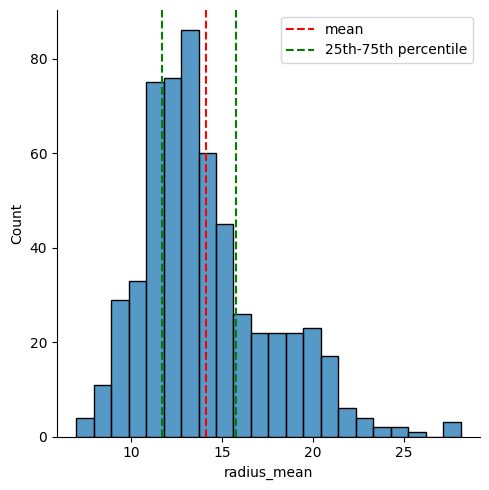

In [13]:
sns.displot(bc['radius_mean'])
plt.axvline(x=np.mean(bc['radius_mean']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(bc['radius_mean'],25),c='green',ls='--',label='25th-75th percentile')
plt.axvline(x=np.percentile(bc['radius_mean'],75),c='green',ls='--')
plt.legend()

##### Histogram for Smoothness Mean

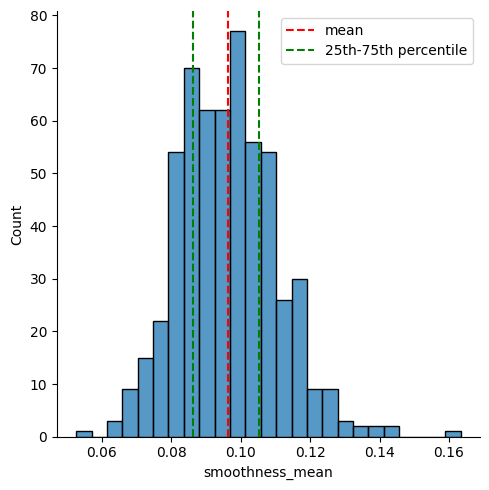

In [52]:
sns.displot(bc['smoothness_mean'])
plt.axvline(x=np.mean(bc['smoothness_mean']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(bc['smoothness_mean'],25),c='green',ls='--',label='25th-75th percentile')
plt.axvline(x=np.percentile(bc['smoothness_mean'],75),c='green',ls='--')
plt.legend()

Through these histograms, we can determine or compare and contrast results for analysis. For these histograms, we can see that for the radius mean, it is relatively skewed right showing that there are on average more patients with smaller sized tumors. As for the smoothness of a tumor, it is approximately normally distributed. Demonstrating that on average, their patients have a mean smoothness of about 0.96. 

### Correlation Analysis

We can now look at correlations through our dataset. Histograms are helpful, but if we want to see if there are any close relationships between different parts of the dataset, we can use different plots and a heatmap. 

So, we are going to use a box plot and swarm plot to determine a correlation between benign and malignant tumor diagnoses with the radius and smoothness of a tumor. As well as create a heatmap demonstrating all the correlations with each part of the dataset.

##### Box Plot for Radius and Diagnosis

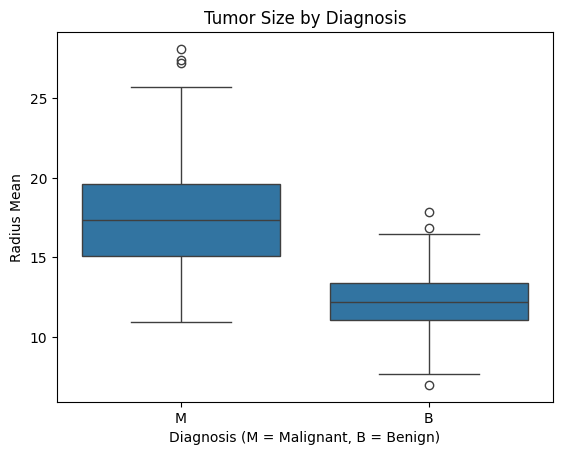

In [34]:
sns.boxplot(x='diagnosis', y='radius_mean', data=bc)
plt.title('Tumor Size by Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Radius Mean')
plt.show()

##### Strip plot for Radius and Diagnosis

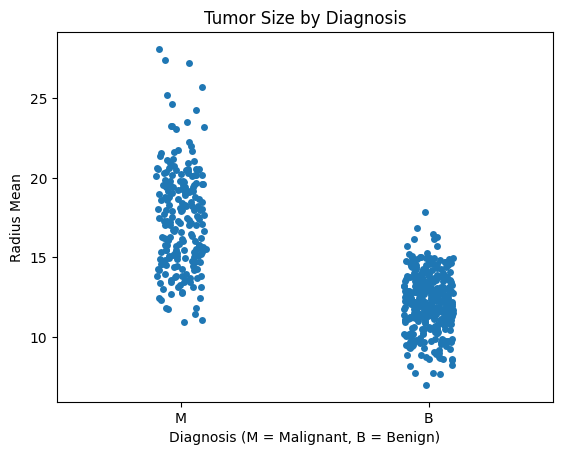

In [54]:
sns.stripplot(x='diagnosis', y='radius_mean', data=bc)
plt.title('Tumor Size by Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Radius Mean')
plt.show()

We can see from both the strip plot and box plot above that on the malignant column (M), that the higher/bigger the radius of a tumor is, the more likely a patient is going to have a cancerous tumor. As for the benign (B) column, the smaller a tumor is, it will be more likely that it is NOT cancerous.

##### Box Plot for Smoothness and Diagnosis

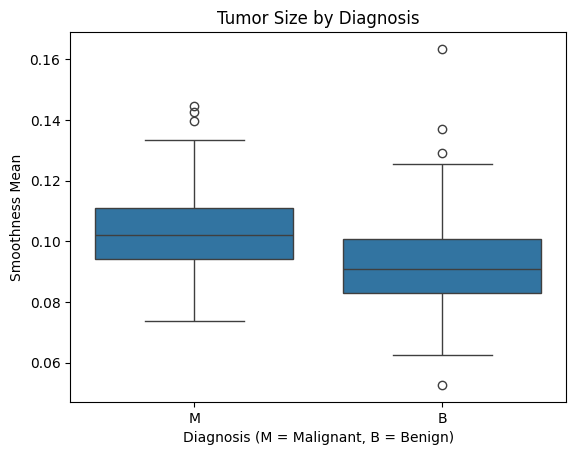

In [37]:
sns.boxplot(x='diagnosis', y='smoothness_mean', data=bc)
plt.title('Tumor Size by Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Smoothness Mean')
plt.show()

##### Swarm Plot for Smoothness and Diagnosis

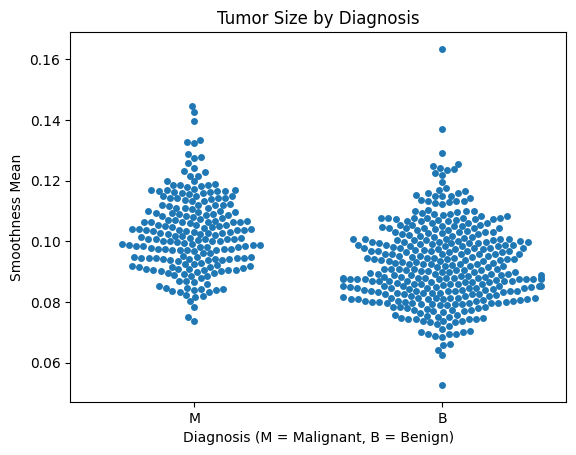

In [55]:
sns.swarmplot(x='diagnosis', y='smoothness_mean', data=bc)
plt.title('Tumor Size by Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Smoothness Mean')
plt.show()

Similarly to the relationship between the radius of a tumor and the diagnosis, we can read that there is somewhat a correlation between the smoothness of a tumor and the diagnosis. A patient would be more likely to be diagnosed with a malignant tumor if the smoothness is high. If it's small, then it is less likely to be diagnosed as malignant; thus, benign. 

However, given that the distinguishment between malignant (M) and benign (B) are somewhat similar when it comes to size, it is hard make a solid conclusion that the smoothness diagnosis depends on the smoothness. Hence, it will need more testing/data for the future. 

### Mean Heatmap

We will only be analyzing the mean columns of the dataset. Hence, we will remove all extraneous columns that do not calculate the mean, including the diagnostic column.

In [46]:
bc_new = bc.drop(['diagnosis','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'], axis=1)

Heatmaps are used to visualize correlation matrices, so we can calculate the correlation matrix with this line of code below:

In [48]:
corr_matrix = bc_new.corr()

Now that we have removed our unwanted columns, and made our dataset into a correlation matrix we can plot our heatmap:

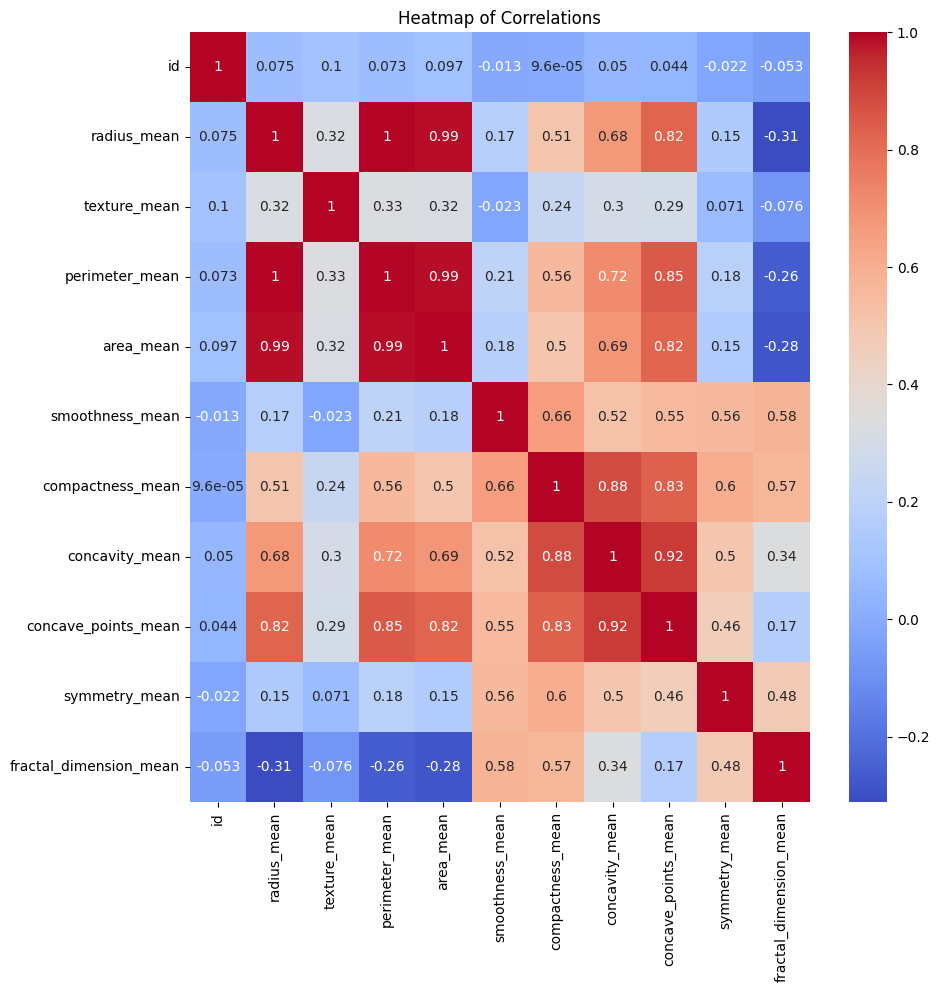

In [51]:
plt.figure(figsize=(10, 10))  # Adjust the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

From this heatmap, we can determine which sections in the dataset have a strong or weak (negatively or positively) correlation with each other. For instance, the area of a tumor and the radius of a tumor have an obviously strong correlation of 0.99. In addition, the compactness and concavity means have a relatively strong correlation of 0.88. 